# Rapport Explicatif pour l'implémentation de la segmentation de clients avec K-Means:

Ce code utilise l'algorithme de clustering K-Means pour segmenter les clients en groupes en fonction de leur revenu annuel et de leur score de dépense. L'objectif est de créer des clusters distincts de clients afin d'analyser leur comportement et éventuellement adapter des stratégies marketing pour chaque groupe.

## Bibliothèques Utilisées:

**Numpy** : Fournit des outils pour les calculs numériques.

**Pandas** : Manipule et analyse les données en format tabulaire (fichiers CSV).

**Matplotlib et Seaborn** : Permettent de visualiser les données.

**Scikit-learn** : Fournit des algorithmes de machine learning, dont le clustering K-Means, et des outils pour la normalisation des données.

In [6]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_in

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Étapes du Prétraitement des Données:
### Chargement des Données:

Ce code charge un fichier CSV contenant des informations sur les clients, avec leur revenu annuel, score de dépense, âge, et genre.

In [8]:
df= pd.read_csv('/Customers.csv', index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Cette ligne renomme la colonne "Genre" en "Gender" pour plus de clarté et de cohérence.

In [9]:
df.rename(columns= {'Genre': 'Gender'}, inplace = True) #To rename column 2 from Genre to Gender
df.head() #Checking if the correction has been effected


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Ces lignes permettent d'explorer les données :

**df.dtypes** : Montre les types de données (nombre entier, flottant, etc.) pour chaque colonne.

**df.shape** : Donne le nombre de lignes et de colonnes dans le dataset.

**df.describe()** : Fournit des statistiques descriptives comme la moyenne, l'écart type, et les valeurs minimales/maximales pour les colonnes numériques.

In [10]:
df.dtypes #returns the data types of the variables


,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [11]:
df.shape #retuns the number of rows and columns in the dataset.


(200, 4)

In [12]:
df.describe() #returns the descriptive statistics of the dataset.


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**df.isnull().sum()** : Vérifie s'il y a des valeurs manquantes dans le dataset.

**df.duplicated()** : Identifie les doublons dans les données.

In [13]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [14]:
df.duplicated()

,0
CustomerID,
1,False
2,False
3,False
4,False
5,False
...,...
196,False
197,False
198,False


Cette ligne crée un diagramme de dispersion pour visualiser la relation entre le revenu annuel des clients et leur score de dépense. Cela permet d'identifier visuellement les regroupements potentiels de clients.

Text(0.5, 1.0, 'Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

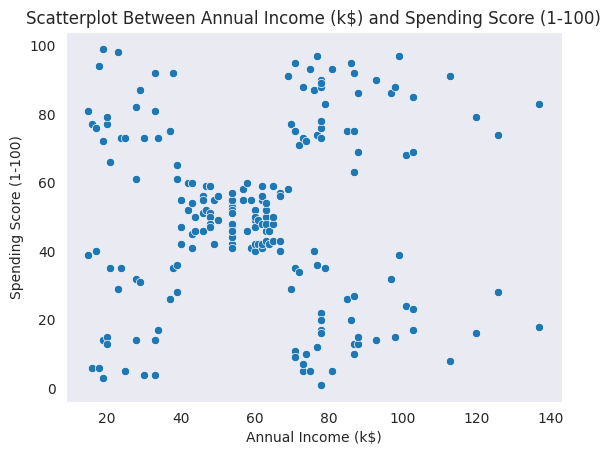

In [15]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

## Préparation des Données pour le Clustering:
### Sélection des Caractéristiques:

Les variables Annual Income et Spending Score sont sélectionnées pour effectuer le clustering. Ces deux caractéristiques sont jugées pertinentes pour définir les groupes de clients.

In [16]:
X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values


Comme K-Means est sensible aux échelles des caractéristiques, les données sont normalisées entre 0 et 1 à l'aide de MinMaxScaler. Cela garantit que les distances entre les points dans l'espace de caractéristiques ne sont pas biaisées par la différence d'échelle entre le revenu et le score de dépense.

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [18]:
print(X[0])

[0.        0.3877551]


## Clustering avec K-Means:
### Méthode du Coude (Elbow Method):

La méthode du coude permet de déterminer le nombre optimal de clusters (ou groupes) pour K-Means.

WCSS (Within-Cluster Sum of Squares) : Mesure la somme des distances au carré des points par rapport à leur centre de cluster.
Elbow Point : Le point où l'ajout de clusters supplémentaires n'améliore plus significativement la qualité du clustering est le nombre optimal de clusters.

In [19]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Le graphique du coude est tracé pour visualiser la valeur de WCSS en fonction du nombre de clusters. Le nombre optimal de clusters se trouve là où le graphique commence à former un coude, indiquant que l'ajout de nouveaux clusters n'améliore plus beaucoup la qualité du modèle.

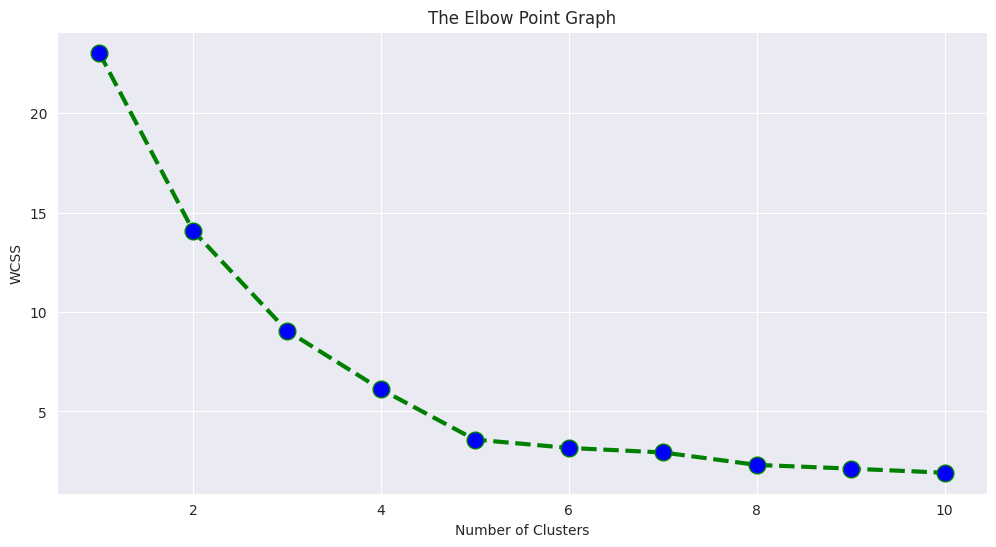

In [20]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Après avoir identifié que 5 clusters semblent être le bon choix (d'après le coude), le modèle K-Means est appliqué avec 5 clusters. Le modèle attribue chaque client à un cluster en fonction de son revenu annuel et de son score de dépense.

In [21]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++')
label= kmeans.fit_predict(X)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


## Résultats et Visualisation:
### Affichage des Centroides:

Les centroïdes des 5 clusters sont affichés. Chaque centroïde représente le centre moyen de ses points associés, défini en termes de revenu annuel et score de dépense.

In [22]:
print(kmeans.cluster_centers_)

[[0.08792846 0.79962894]
 [0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.6        0.16443149]
 [0.09265859 0.20319432]]


Un graphique est créé pour visualiser les 5 clusters. Chaque cluster est représenté par une couleur différente, et les centroides sont marqués avec des étoiles noires pour indiquer le centre de chaque cluster.

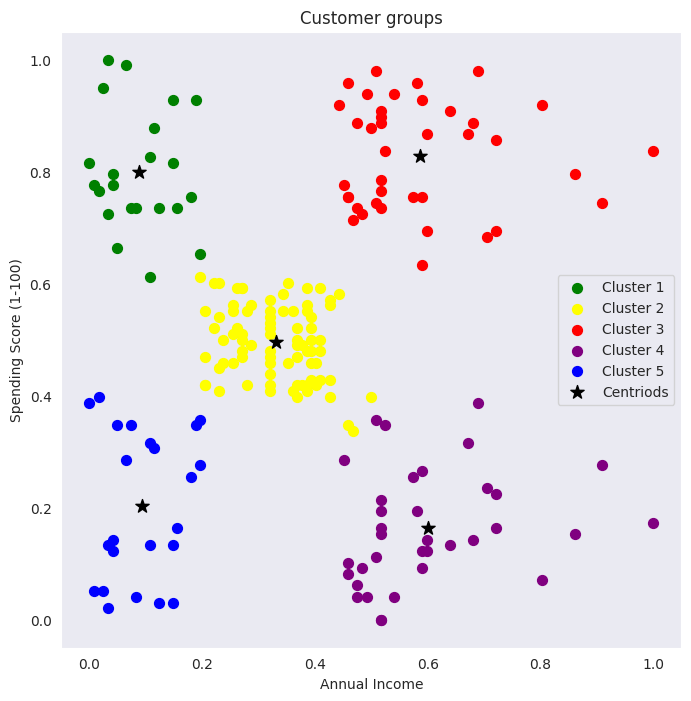

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()